In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import time
from datetime import datetime
import calendar
import os

In [2]:
# you have to edit this cell

# the maximum number of platform you want (sorting by number of project)
number_of_top_rank = 7

# number of samples per platform per year (research question)
nb_of_projects = 50

# number of samples for all (research question 2)
nb_of_projects2 = 20000

# using year for criteria or specify number of period(is_separate_by_year = false)
is_separate_by_year = True
nb_of_peroids = 0

# intesested_number_features: for the numeric features.
interested_number_features = ['Repository Fork?', 'Repository Forks Count', 'Repository Issues enabled?', 
                              'Repository Wiki enabled?', 'Repository Pages enabled?', 'Repository Open Issues Count']
# intersted_string_feature: for the string features which will make keys as features(with binary value).
interested_string_features = []

# interested_not_nan_features: for featurs which will be 1 if there is somthing in value and 0 if nothing.
interested_not_nan_features = ['Repository Readme filename', 'Repository Changelog filename', 
                               'Repository Contributing guidelines filename', 'Repository License filename', 
                               'Repository Code of Conduct filename', 'Repository Security Threat Model filename', 
                               'Repository Security Audit filename']

# interested_special_format_features:  for features which you want to label by yourself
# top 10
# interested_special_format_features = [{'feature' : 'Platform', 'values' : {'Go' : 0, 'NPM' : 0.1, 'Packagist' : 0.2, 'Rubygems' : 0.3, 'Pypi' : 0.4, 'Bower' : 0.5, 'Maven' : 0.6, 'NuGet' : 0.7, 'CocoaPods' : 0.8, 'Clojars' : 0.9}}]
# top 7
# interested_special_format_features = [{'feature' : 'Platform', 'values' : {'Go' : 0, 'NPM' : 0.02, 'Packagist' : 0.04, 'Rubygems' : 0.06, 'Pypi' : 0.08, 'Bower' : 0.10, 'Maven' : 0.12}}]
interested_special_format_features = [{'feature' : 'Platform', 'values' : {'Go' : 0, 'NPM' : 1/6, 'Packagist' : 2/6, 'Rubygems' : 3/6, 'Pypi' : 4/6, 'Bower' : 5/6, 'Maven' : 1}}]

# interested_time_features: for timestamp features.
interested_time_features = []


In [3]:
# load csvfile
df = pd.read_csv("projects_with_repository_fields-1.2.0-2018-03-12.csv", index_col=False)
df

C:\Users\jirateep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,17,36,49,50,51,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Platform,Name,Created Timestamp,Updated Timestamp,Description,Keywords,Homepage URL,Licenses,Repository URL,...,Repository Security Threat Model filename,Repository Security Audit filename,Repository Status,Repository Last Synced Timestamp,Repository SourceRank,Repository Display Name,Repository SCM type,Repository Pull requests enabled?,Repository Logo URL,Repository Keywords
0,1,Alcatraz,21st digital Templates,2015-01-11 23:56:18 UTC,2018-03-12 01:03:55 UTC,"A starting point for stripped down, structured...",NaN,https://github.com/21stdigital/Xcode-Templates,NaN,https://github.com/21stdigital/Xcode-Templates,...,NaN,NaN,NaN,2017-04-20 00:24:04 UTC,3.0,GitHub,NaN,git,NaN,NaN
1,2,Alcatraz,ACCodeSnippetRepository,2015-01-11 23:56:18 UTC,2018-03-12 01:03:58 UTC,Synchronize code snippets with a git repository.,NaN,https://github.com/acoomans/ACCodeSnippetRepos...,MIT,https://github.com/acoomans/ACCodeSnippetRepos...,...,NaN,NaN,NaN,2016-11-24 13:23:15 UTC,7.0,GitHub,NaN,NaN,NaN,NaN
2,3,Alcatraz,AdjustFontSize,2015-01-11 23:56:18 UTC,2018-03-12 01:04:00 UTC,Adjust font size with ⌃ + / ⌃ -,NaN,https://github.com/zats/AdjustFontSize-Xcode-P...,NaN,https://github.com/zats/AdjustFontSize-Xcode-P...,...,NaN,NaN,NaN,2016-05-27 14:58:22 UTC,6.0,GitHub,NaN,NaN,NaN,NaN
3,4,Alcatraz,AeroGear Template,2015-01-11 23:56:18 UTC,2018-03-12 01:03:59 UTC,"Setup for your AeroGear projects, based on Coc...",NaN,https://github.com/aerogear/aerogear-ios-xcode...,NaN,https://github.com/aerogear/aerogear-ios-xcode...,...,NaN,NaN,NaN,2016-05-27 18:34:12 UTC,3.0,GitHub,NaN,NaN,NaN,NaN
4,5,Alcatraz,Aerolitec Templates,2015-01-11 23:56:18 UTC,2018-03-12 01:04:06 UTC,File templates for Aerolitec Coding Standard,NaN,https://github.com/Aerolitec/aerolitec-templates,NaN,https://github.com/Aerolitec/aerolitec-templates,...,NaN,NaN,NaN,2017-07-31 00:41:45 UTC,2.0,GitHub,NaN,git,NaN,NaN
5,6,Alcatraz,AMMethod2Implement,2015-01-11 23:56:18 UTC,2018-03-12 01:04:07 UTC,A simple Xcode plugin to generate implement co...,NaN,https://github.com/MellongLau/AMMethod2Implement,MIT,https://github.com/MellongLau/AMMethod2Implement,...,NaN,NaN,NaN,2016-11-24 13:23:15 UTC,6.0,GitHub,NaN,NaN,NaN,NaN
6,7,Alcatraz,Anubis,2015-01-11 23:56:18 UTC,2018-03-12 01:03:59 UTC,Easy on the eyes dark theme with pastel colour...,NaN,https://raw.githubusercontent.com/gtranchedone...,NaN,https://raw.githubusercontent.com/gtranchedone...,...,NaN,NaN,NaN,2017-02-23 14:57:00 UTC,3.0,GitHub,NaN,NaN,NaN,NaN
7,8,Alcatraz,ApportablePlugin,2015-01-11 23:56:18 UTC,2018-03-12 01:03:55 UTC,Simple Plugin for work with Apportable support...,NaN,https://github.com/johnno1962/ApportablePlugin,NaN,https://github.com/johnno1962/ApportablePlugin,...,NaN,NaN,NaN,2016-05-27 13:19:59 UTC,3.0,GitHub,NaN,NaN,NaN,NaN
8,9,Alcatraz,Aqueducts 3.0 (Dawn),2015-01-11 23:56:18 UTC,2018-03-12 01:03:58 UTC,Non-drowsy aggressive underwater pastels for d...,NaN,https://raw.github.com/brynbellomy/xcode-aqued...,NaN,https://raw.github.com/brynbellomy/xcode-aqued...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Alcatraz,Aqueducts 3.0 (Night),2015-01-11 23:56:18 UTC,2018-03-12 01:03:56 UTC,Non-habit-forming sleepless underwater pastels...,NaN,https://raw.github.com/brynbellomy/xcode-aqued...,NaN,https://raw.github.com/brynbellomy/xcode-aqued...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# show first row
df.iloc[0]

ID                                                                                             1
Platform                                                                                Alcatraz
Name                                                                      21st digital Templates
Created Timestamp                                                        2015-01-11 23:56:18 UTC
Updated Timestamp                                                        2018-03-12 01:03:55 UTC
Description                                    A starting point for stripped down, structured...
Keywords                                                                                     NaN
Homepage URL                                      https://github.com/21stdigital/Xcode-Templates
Licenses                                                                                     NaN
Repository URL                                    https://github.com/21stdigital/Xcode-Templates
Versions Count                

In [5]:
# show all possible platforms
platforms = df['Platform'].unique()
platforms

array(['Alcatraz', 'Dub', 'Hex', 'Jam', 'Emacs', 'Bower', 'Sublime', 'Pub',
       'NPM', 'Cargo', 'Pypi', 'Packagist', 'Rubygems', 'Hackage',
       'Nimble', 'Maven', 'Go', 'Wordpress', 'NuGet', 'CPAN', 'CRAN',
       'Meteor', 'Clojars', 'CocoaPods', 'Elm', 'Julia', 'PlatformIO',
       'Atom', 'Inqlude', 'Homebrew', 'Carthage', 'Shards', 'SwiftPM',
       'Haxelib', 'Puppet', 'Racket', 'PureScript'], dtype=object)

In [6]:
def remove_zero(my_list) :
    return [i for i in my_list if i > 0]

In [7]:
def remove_nan(my_list) :
    new_list = []
    for i in my_list :
        if type(i) == type('') or not math.isnan(i) :
            new_list.append(i)
    return new_list

In [8]:
def make_dict_for_bar(my_list) :
    my_dict = {}
    for i in my_list :
        if i not in my_dict :
            my_dict[i] = 0
        my_dict[i] += 1
    return my_dict

In [9]:
def plot_bar(my_list, title="") :
    my_dict = make_dict_for_bar(my_list)
    plt.bar(my_dict.keys(), my_dict.values(), align='center')#, subplots=True)
    plt.title(title)
    plt.show()

In [10]:
def plot_his(my_list, last=-1, title="") :
    my_list = remove_nan(my_list)
    if last < 0 :
        plt.hist(my_list, bins =200, range = (min(my_list), max(my_list)))
    else :
        plt.hist(my_list, bins =200, range = (min(my_list), last))
    plt.title(title)
    plt.show()

In [11]:
def get_ts_list(my_time_list) :
    return [i for i in [calendar.timegm(time.strptime(i[:10], '%Y-%m-%d')) for i in my_time_list] if i > 0]

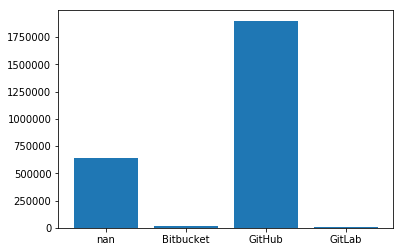

In [12]:
# show the number of projects in each repository and choose only in Github
plot_bar(list(df['Repository Host Type']))

In [13]:
# filter only project on github repositories
df = df[df['Repository Host Type'] == 'GitHub']
df

,ID,Platform,Name,Created Timestamp,Updated Timestamp,Description,Keywords,Homepage URL,Licenses,Repository URL,...,Repository Security Threat Model filename,Repository Security Audit filename,Repository Status,Repository Last Synced Timestamp,Repository SourceRank,Repository Display Name,Repository SCM type,Repository Pull requests enabled?,Repository Logo URL,Repository Keywords
0,1,Alcatraz,21st digital Templates,2015-01-11 23:56:18 UTC,2018-03-12 01:03:55 UTC,"A starting point for stripped down, structured...",NaN,https://github.com/21stdigital/Xcode-Templates,NaN,https://github.com/21stdigital/Xcode-Templates,...,NaN,NaN,NaN,2017-04-20 00:24:04 UTC,3.0,GitHub,NaN,git,NaN,NaN
1,2,Alcatraz,ACCodeSnippetRepository,2015-01-11 23:56:18 UTC,2018-03-12 01:03:58 UTC,Synchronize code snippets with a git repository.,NaN,https://github.com/acoomans/ACCodeSnippetRepos...,MIT,https://github.com/acoomans/ACCodeSnippetRepos...,...,NaN,NaN,NaN,2016-11-24 13:23:15 UTC,7.0,GitHub,NaN,NaN,NaN,NaN
2,3,Alcatraz,AdjustFontSize,2015-01-11 23:56:18 UTC,2018-03-12 01:04:00 UTC,Adjust font size with ⌃ + / ⌃ -,NaN,https://github.com/zats/AdjustFontSize-Xcode-P...,NaN,https://github.com/zats/AdjustFontSize-Xcode-P...,...,NaN,NaN,NaN,2016-05-27 14:58:22 UTC,6.0,GitHub,NaN,NaN,NaN,NaN
3,4,Alcatraz,AeroGear Template,2015-01-11 23:56:18 UTC,2018-03-12 01:03:59 UTC,"Setup for your AeroGear projects, based on Coc...",NaN,https://github.com/aerogear/aerogear-ios-xcode...,NaN,https://github.com/aerogear/aerogear-ios-xcode...,...,NaN,NaN,NaN,2016-05-27 18:34:12 UTC,3.0,GitHub,NaN,NaN,NaN,NaN
4,5,Alcatraz,Aerolitec Templates,2015-01-11 23:56:18 UTC,2018-03-12 01:04:06 UTC,File templates for Aerolitec Coding Standard,NaN,https://github.com/Aerolitec/aerolitec-templates,NaN,https://github.com/Aerolitec/aerolitec-templates,...,NaN,NaN,NaN,2017-07-31 00:41:45 UTC,2.0,GitHub,NaN,git,NaN,NaN
5,6,Alcatraz,AMMethod2Implement,2015-01-11 23:56:18 UTC,2018-03-12 01:04:07 UTC,A simple Xcode plugin to generate implement co...,NaN,https://github.com/MellongLau/AMMethod2Implement,MIT,https://github.com/MellongLau/AMMethod2Implement,...,NaN,NaN,NaN,2016-11-24 13:23:15 UTC,6.0,GitHub,NaN,NaN,NaN,NaN
6,7,Alcatraz,Anubis,2015-01-11 23:56:18 UTC,2018-03-12 01:03:59 UTC,Easy on the eyes dark theme with pastel colour...,NaN,https://raw.githubusercontent.com/gtranchedone...,NaN,https://raw.githubusercontent.com/gtranchedone...,...,NaN,NaN,NaN,2017-02-23 14:57:00 UTC,3.0,GitHub,NaN,NaN,NaN,NaN
7,8,Alcatraz,ApportablePlugin,2015-01-11 23:56:18 UTC,2018-03-12 01:03:55 UTC,Simple Plugin for work with Apportable support...,NaN,https://github.com/johnno1962/ApportablePlugin,NaN,https://github.com/johnno1962/ApportablePlugin,...,NaN,NaN,NaN,2016-05-27 13:19:59 UTC,3.0,GitHub,NaN,NaN,NaN,NaN
10,11,Alcatraz,Armadillu,2015-01-11 23:56:18 UTC,2018-03-12 01:04:02 UTC,"Dark deep blue theme, with saturated highlight...",NaN,https://raw.githubusercontent.com/armadillu/Xc...,NaN,https://raw.githubusercontent.com/armadillu/Xc...,...,NaN,NaN,NaN,2017-09-06 22:37:01 UTC,2.0,GitHub,NaN,git,NaN,NaN
12,13,Alcatraz,Auto-Importer,2015-01-11 23:56:18 UTC,2018-03-12 01:03:56 UTC,A plugin to quickly import your headers on the...,NaN,https://github.com/lucholaf/Auto-Importer-for-...,MIT,https://github.com/lucholaf/Auto-Importer-for-...,...,NaN,NaN,NaN,2016-11-24 13:23:52 UTC,8.0,GitHub,NaN,git,NaN,NaN


In [14]:
# show the first and last created time
ts_list = get_ts_list(list(df['Created Timestamp']))
ts_list = sorted(set(ts_list))
print(datetime.utcfromtimestamp(ts_list[0]), datetime.utcfromtimestamp(ts_list[len(ts_list)-1]))

2015-01-11 00:00:00 2018-03-12 00:00:00


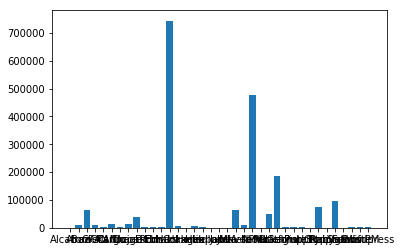

In [15]:
# show Platforms distribution
plot_bar(list(df['Platform']))

In [16]:
# select interesting features

interested_features = interested_number_features + interested_string_features + interested_not_nan_features + [i['feature'] for i in interested_special_format_features] + interested_time_features
print(interested_features)

['Repository Fork?', 'Repository Forks Count', 'Repository Issues enabled?', 'Repository Wiki enabled?', 'Repository Pages enabled?', 'Repository Open Issues Count', 'Repository Readme filename', 'Repository Changelog filename', 'Repository Contributing guidelines filename', 'Repository License filename', 'Repository Code of Conduct filename', 'Repository Security Threat Model filename', 'Repository Security Audit filename', 'Platform']


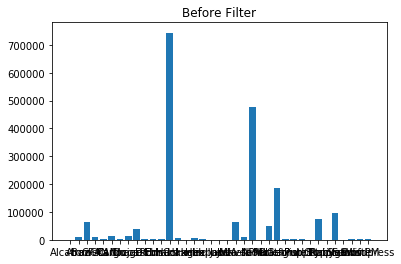

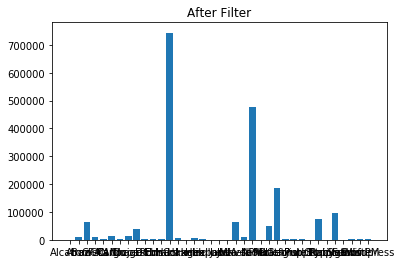

In [17]:
#filter out the NaN value in the interesting feature fields
new_df = df.copy()
for feature in interested_not_nan_features :
    new_df[feature]=new_df[feature].fillna('-')
new_df = new_df.dropna(subset=interested_features)
plot_bar(list(df['Platform']), title='Before Filter')
plot_bar(list(new_df['Platform']), title='After Filter')

In [18]:
# find the top n most projects platforms

sort_unclean_list = sorted(make_dict_for_bar(df['Platform']).items(), key=lambda x: x[1], reverse=True)
# print(sort_unclean_list)
platform_dict_with_count = make_dict_for_bar(list(new_df['Platform']))
sort_list = sorted(platform_dict_with_count.items(), key=lambda x: x[1], reverse=True)
print(sort_list)
great_platform_list = [i[0] for i in sort_list[:number_of_top_rank]]
print(great_platform_list)
print('total sample:', sum([i[1] for i in sort_list[:number_of_top_rank]]))

[('Go', 743841), ('NPM', 478025), ('Packagist', 187172), ('Rubygems', 95014), ('Pypi', 74873), ('Bower', 64998), ('Maven', 62654), ('NuGet', 51201), ('CocoaPods', 38197), ('Clojars', 13807), ('Cargo', 12253), ('Atom', 10387), ('CPAN', 10023), ('Meteor', 9601), ('Hackage', 7633), ('Hex', 5567), ('Puppet', 4425), ('SwiftPM', 4010), ('CRAN', 3365), ('Carthage', 2641), ('Pub', 2630), ('Emacs', 2614), ('Wordpress', 2506), ('PlatformIO', 2217), ('Sublime', 1903), ('Homebrew', 1669), ('Dub', 1324), ('Elm', 1292), ('Haxelib', 905), ('Julia', 783), ('Racket', 740), ('Nimble', 611), ('Jam', 462), ('Alcatraz', 399), ('PureScript', 184), ('Inqlude', 64), ('Shards', 30)]
['Go', 'NPM', 'Packagist', 'Rubygems', 'Pypi', 'Bower', 'Maven']
total sample: 1706577


In [19]:
# filter the most projects Platforms
new_df = new_df[new_df['Platform'].isin(great_platform_list)]
new_df
ts_list = get_ts_list(list(new_df['Created Timestamp']))
ts_list = sorted(set(ts_list))
print(datetime.utcfromtimestamp(ts_list[0]), datetime.utcfromtimestamp(ts_list[len(ts_list)-1]))
len(new_df)

2015-01-12 00:00:00 2018-03-12 00:00:00


1706577

In [20]:
def print_all_interested_chart(df) :
    plot_bar(list(df['Platform']), title='Platform')
    # plot_bar(list(df['Language']), title='Language')
    # plot_bar(list(df['Licenses']), title='Licenses')
    plot_his(list(df['Repository Contributors Count']), 200, title='Repository Contributors Count')
    plot_his(list(df['Repository Size']), 100, title='Repository Size')
    plot_his(list(df['Repository Stars Count']), title='Repository Stars Count')
    # plot_his(list(df['Dependent Projects Count']), 200, title='Dependent Projects Count')
    # plot_his(list(df['Dependent Repositories Count']), 200, title='Dependent Repositories Count')
    # plot_bar(remove_nan(list(df['Status'])), title='Status')
    plot_bar(list(df['Repository Issues enabled?']), title='Repository Issues enabled?')
    plot_bar(list(df['Repository Wiki enabled?']), title='Repository Wiki enabled?')
    plot_bar(list(df['Repository Pages enabled?']), title='Repository Pages enabled?')
    # plot_bar(list(df['Repository Pull requests enabled?']), title='Repository Pull requests enabled?')
    plot_his(list(df['Repository Open Issues Count']), 100, title='Repository Open Issues Count')
    plot_his(list(df['Repository Watchers Count']), 100, title='Repository Watchers Count')
    # plot_his(list(df['SourceRank']), 100, title='SourceRank')
    # plot_his(list(df['Repository SourceRank']), 100,title='Repository SourceRank')

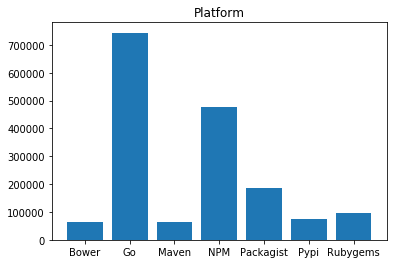

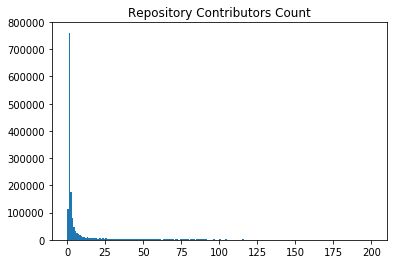

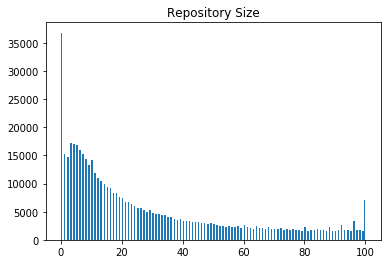

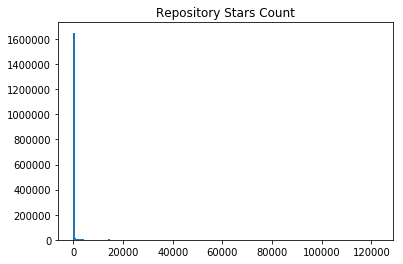

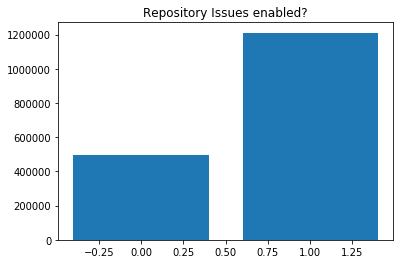

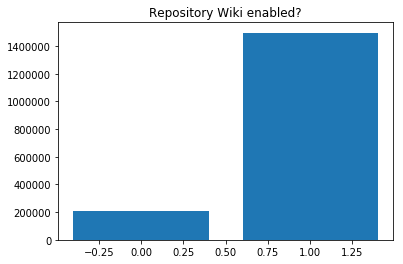

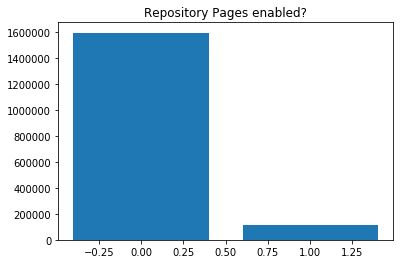

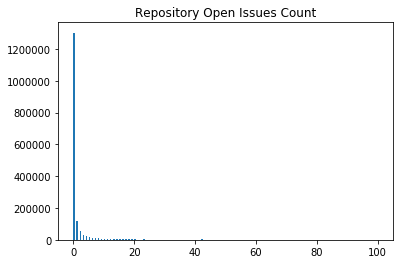

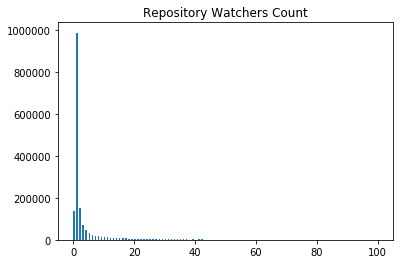

In [21]:
print_all_interested_chart(new_df)

In [22]:
# find maximum contributor in project
def find_max(df) :
    max_platforms = df.groupby(['Platform']).max()

    maxi = {}
    for i in interested_number_features :
        maxi[i] = dict(max_platforms[i])
    return maxi
# maxi = find_max(platform_df)

In [23]:
# create vectors (in project / max in platform)
def mk_vectors(maxi, df) :
    vectors = []
    for i in range(len(df)) :
        row = df.iloc[i]
        now_dict = {} 
        for j in interested_number_features :
            if type(row[j]) == type(True) :
                now_dict[j] = 1 if row[j] else 0
            else :
                now_dict[j] = row[j]/maxi[j][row['Platform']]
        for j in interested_string_features :
            now_dict[j] = row[j]
        for j in interested_not_nan_features :
            now_dict[j] = 0 if row[j] == '-' else 1
        for j in interested_special_format_features :
            now_dict[j['feature']] = j['values'][row[j['feature']]]
        for j in interested_time_features :
            now_dict[j] = calendar.timegm(time.strptime(row[j][:19], '%Y-%m-%d %H:%M:%S'))
        vectors.append(now_dict)
    return vectors
# vectors = mk_vectors(platform_df)

In [24]:
# unique the value to get the binary vector
def get_uniq_value(df) :
    uniq_value = {}
    for i in interested_string_features :
        uniq_value[i] = set(list(df[i]))
    return uniq_value

# uniq_value = get_uniq_value(platform_df)
def get_string_vector(feature, string) :
    vector = ['0' for _ in range(len(uniq_value[feature]))]
    vector[list(uniq_value[feature]).index(string)] = '1'
    return vector

In [25]:
# export csv - project_vectors.csv
def export_file(vectors, filename) :
    with open(filename, 'w', encoding="utf-8") as fr:
        # header
        line_list = []
        for i in interested_number_features :
            line_list += [i]
        for i in interested_string_features :
            line_list += uniq_value[i]
        for i in interested_not_nan_features :
            line_list += [i]
        for i in interested_special_format_features :
            line_list += [i['feature']]
        for i in interested_time_features :
            line_list += [i]
        line = ','.join([str(i) for i in line_list])
        fr.write(line)
        # print(line)
        # data
        for project in vectors :
            vector = []
            for i in interested_number_features :
                vector += [str(project[i])]
            for i in interested_string_features :
                vector += get_string_vector(i,project[i])
            for i in interested_not_nan_features :
                vector += [str(project[i])]
            for i in interested_special_format_features :
                vector += [str(project[i['feature']])]
            for i in interested_time_features :
                vector += [str(project[i])]
            line = ','.join(vector)
            # print(line)
            fr.write('\n'+line)
    print('Completed Writing File')
# export_file('project_vectors.csv')

In [26]:
def df_to_file(df, filename) :
    maxi = find_max(df)
    vectors = mk_vectors(maxi, df)
    uniq_value = get_uniq_value(df)
    export_file(vectors, filename)

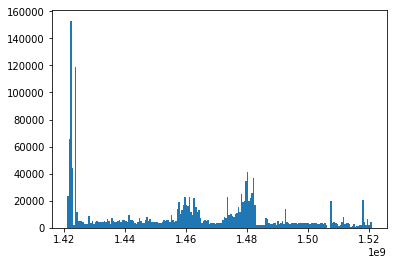

In [27]:
# separate by time to find the evolution of platforms
plot_his(get_ts_list(list(new_df['Created Timestamp'])))

In [28]:
# change string to int(timestamp)
ts_df = new_df.copy()
# ts_df['Created ts'] = ts_df.apply (lambda row: (calendar.timegm(time.strptime(row['Created Timestamp'][:-4], '%Y-%m-%d %H:%M:%S'))),axis=1
ts_df['Created ts'] = [calendar.timegm(time.strptime(i[:-4], '%Y-%m-%d %H:%M:%S')) for i in ts_df['Created Timestamp']]
# print(len(list(ts_df)), len(list(platform_df)))
ts_df

,ID,Platform,Name,Created Timestamp,Updated Timestamp,Description,Keywords,Homepage URL,Licenses,Repository URL,...,Repository Security Audit filename,Repository Status,Repository Last Synced Timestamp,Repository SourceRank,Repository Display Name,Repository SCM type,Repository Pull requests enabled?,Repository Logo URL,Repository Keywords,Created ts
1683,1688,Bower,10digit-geo,2015-01-12 00:06:29 UTC,2018-03-12 00:00:51 UTC,Geo components for AngularJS driven apps,NaN,NaN,NaN,https://github.com/10digit/geo.git,...,-,NaN,2016-04-29 04:06:18 UTC,1.0,GitHub,NaN,git,NaN,NaN,1421021189
1684,1689,Bower,10digit-invoices,2015-01-12 00:06:29 UTC,2018-03-12 00:00:51 UTC,Used along side services to display past and u...,NaN,NaN,NaN,https://github.com/10digit/invoices.git,...,-,NaN,2016-04-29 04:06:18 UTC,2.0,GitHub,NaN,git,NaN,NaN,1421021189
1685,1690,Bower,10digit-legal,2015-01-12 00:06:29 UTC,2018-03-12 00:00:52 UTC,Legal agreement,NaN,NaN,NaN,https://github.com/10digit/legal.git,...,-,NaN,2016-04-29 04:06:18 UTC,1.0,GitHub,NaN,git,NaN,NaN,1421021189
1686,1691,Bower,10digit-payment,2015-01-12 00:06:29 UTC,2018-03-12 00:00:52 UTC,Payment component,NaN,NaN,NaN,https://github.com/10digit/payment.git,...,-,NaN,2016-04-29 04:06:18 UTC,2.0,GitHub,NaN,git,NaN,NaN,1421021189
1687,1692,Bower,10digit-profile,2015-01-12 00:06:29 UTC,2018-03-12 00:00:52 UTC,NaN,NaN,NaN,NaN,https://github.com/10digit/profile.git,...,-,NaN,2016-04-29 04:06:20 UTC,0.0,GitHub,NaN,git,NaN,NaN,1421021189
1688,1693,Bower,10digit-services,2015-01-12 00:06:29 UTC,2018-03-12 00:00:53 UTC,"Create, update and cancel services",NaN,NaN,NaN,https://github.com/10digit/services.git,...,-,NaN,2016-04-29 04:06:19 UTC,2.0,GitHub,NaN,git,NaN,NaN,1421021189
1689,1694,Bower,10digit-utils,2015-01-12 00:06:29 UTC,2018-03-12 00:00:53 UTC,NaN,NaN,NaN,NaN,https://github.com/10digit/utils.git,...,-,NaN,2016-04-29 04:05:35 UTC,2.0,GitHub,NaN,git,NaN,NaN,1421021189
1690,1695,Bower,10digit-validation,2015-01-12 00:06:29 UTC,2018-03-12 00:00:53 UTC,Helpers for validation,NaN,NaN,NaN,https://github.com/10digit/validation.git,...,-,NaN,2016-04-29 04:06:19 UTC,1.0,GitHub,NaN,git,NaN,NaN,1421021189
1691,1696,Bower,1140px-responsive-css-grid,2015-01-12 00:06:30 UTC,2018-03-12 00:00:55 UTC,1140px Responsive CSS Grid,NaN,NaN,MIT,https://github.com/aosmialowski/1140px-Respons...,...,-,NaN,2016-05-27 19:42:47 UTC,5.0,GitHub,NaN,NaN,NaN,NaN,1421021190
1692,1697,Bower,15puzzle,2015-01-12 00:06:30 UTC,2018-03-12 00:00:56 UTC,famous 15 puzzle game,"15,puzzle",https://github.com/rupertqin/15puzzle,MIT,https://github.com/rupertqin/15puzzle.git,...,-,NaN,2016-04-29 04:06:19 UTC,2.0,GitHub,NaN,NaN,NaN,NaN,1421021190


In [29]:
# separate by time into n peroids with the same time length
time_range_list = []
if is_separate_by_year :
    for i in range(2015, 2018) :
        start = calendar.timegm(time.strptime('%d-1-1 0:0:0' %i, '%Y-%m-%d %H:%M:%S'))
        stop = calendar.timegm(time.strptime('%d-1-1 0:0:0' %(i+1), '%Y-%m-%d %H:%M:%S'))
        print(start, stop)
        time_range_list.append([start, stop])
    nb_of_periods = len(time_range_list)
else :
    nb_of_periods = 4

    ts_list = get_ts_list(list(new_df['Created Timestamp']))
    min_ts = min(ts_list)
    max_ts = max(ts_list)
    diff = max_ts - min_ts
    diff /= nb_of_periods
    print('min_ts:', min_ts)
    print('max_ts:', max_ts)
    for i in range(nb_of_periods) :
        print('period%d:' %(i+1), min_ts + diff*i, '-', min_ts + diff*(i+1))
        time_range_list.append([min_ts+diff*i,min_ts+diff*(i+1)])
    for i in range(nb_of_periods) :
        print('period%d:' %(i+1), datetime.utcfromtimestamp(min_ts+i*diff), '-', datetime.utcfromtimestamp(min_ts+(i+1)*diff))

1420070400 1451606400
1451606400 1483228800
1483228800 1514764800


In [30]:
# check number of platforms in period
for this_time in time_range_list :
    this_df = ts_df[(ts_df['Created ts'] >= this_time[0]) & (ts_df['Created ts'] < this_time[1])]
    for platform in great_platform_list :
        print(datetime.utcfromtimestamp(this_time[0]), '-', datetime.utcfromtimestamp(this_time[1]), platform, len(this_df[this_df['Platform'] == platform]))
    print('----------------')

2015-01-01 00:00:00 - 2016-01-01 00:00:00 Go 218386
2015-01-01 00:00:00 - 2016-01-01 00:00:00 NPM 179838
2015-01-01 00:00:00 - 2016-01-01 00:00:00 Packagist 82425
2015-01-01 00:00:00 - 2016-01-01 00:00:00 Rubygems 72881
2015-01-01 00:00:00 - 2016-01-01 00:00:00 Pypi 31382
2015-01-01 00:00:00 - 2016-01-01 00:00:00 Bower 43885
2015-01-01 00:00:00 - 2016-01-01 00:00:00 Maven 54700
----------------
2016-01-01 00:00:00 - 2017-01-01 00:00:00 Go 524946
2016-01-01 00:00:00 - 2017-01-01 00:00:00 NPM 123739
2016-01-01 00:00:00 - 2017-01-01 00:00:00 Packagist 43769
2016-01-01 00:00:00 - 2017-01-01 00:00:00 Rubygems 11885
2016-01-01 00:00:00 - 2017-01-01 00:00:00 Pypi 17294
2016-01-01 00:00:00 - 2017-01-01 00:00:00 Bower 13914
2016-01-01 00:00:00 - 2017-01-01 00:00:00 Maven 7526
----------------
2017-01-01 00:00:00 - 2018-01-01 00:00:00 Go 509
2017-01-01 00:00:00 - 2018-01-01 00:00:00 NPM 143729
2017-01-01 00:00:00 - 2018-01-01 00:00:00 Packagist 50414
2017-01-01 00:00:00 - 2018-01-01 00:00:00 Rub

In [31]:
# for the research question 1

# sample x for each platform (Total x * nb_of_platform) for each period
# sorting by number of stars
all_frame = []
for this_time, i in zip(time_range_list, list(range(nb_of_periods))) :
    this_df = ts_df[(ts_df['Created ts'] >= this_time[0]) & (ts_df['Created ts'] < this_time[1])]
    frame = []
    for platform in great_platform_list :
        # print(time, platform, len(this_df[this_df['Platform'] == platform]))
        now_result = this_df[this_df['Platform']==platform].sort_values(by=['Repository Stars Count', 'Repository Contributors Count'], ascending=False).iloc[0:nb_of_projects]
        frame.append(now_result)
        all_frame.append(now_result)
    period_df = pd.concat(frame)
    df_to_file(period_df, 'period%d.csv' %(i+1))
all_df = pd.concat(all_frame)
df_to_file(all_df, 'all.csv')

Completed Writing File
Completed Writing File
Completed Writing File
Completed Writing File


In [32]:
# for the research question 1

# for finding the number in each period
for this_time in time_range_list :
    this_df = ts_df[(ts_df['Created ts'] >= this_time[0]) & (ts_df['Created ts'] < this_time[1])]
    for platform  in great_platform_list :
        now_result = this_df[this_df['Platform']==platform].sort_values(by=['Repository Stars Count', 'Repository Contributors Count'], ascending=False)
        print(this_time, platform, len(now_result))

[1420070400, 1451606400] Go 218386
[1420070400, 1451606400] NPM 179838
[1420070400, 1451606400] Packagist 82425
[1420070400, 1451606400] Rubygems 72881
[1420070400, 1451606400] Pypi 31382
[1420070400, 1451606400] Bower 43885
[1420070400, 1451606400] Maven 54700
[1451606400, 1483228800] Go 524946
[1451606400, 1483228800] NPM 123739
[1451606400, 1483228800] Packagist 43769
[1451606400, 1483228800] Rubygems 11885
[1451606400, 1483228800] Pypi 17294
[1451606400, 1483228800] Bower 13914
[1451606400, 1483228800] Maven 7526
[1483228800, 1514764800] Go 509
[1483228800, 1514764800] NPM 143729
[1483228800, 1514764800] Packagist 50414
[1483228800, 1514764800] Rubygems 8611
[1483228800, 1514764800] Pypi 21219
[1483228800, 1514764800] Bower 6472
[1483228800, 1514764800] Maven 428


In [33]:
# for the research question 2

try:
    os.makedirs('./platforms')
except OSError:
    pass

for platform in great_platform_list :
    now_result = new_df[new_df['Platform']==platform].sort_values(by=['Repository Stars Count', 'Repository Contributors Count'], ascending=False).iloc[0:nb_of_projects2]
    print(len(now_result))
    df_to_file(now_result, 'platforms/%s.csv' %(platform))

20000
Completed Writing File
20000
Completed Writing File
20000
Completed Writing File
20000
Completed Writing File
20000
Completed Writing File
20000
Completed Writing File
20000
Completed Writing File
